In [1]:
import os

#Data Manipulation
import pandas as pd
import numpy as np

#Data Visualization
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objs as go

#import mpld3
#%matplotlib inline
#%matplotlib widget
#matplotlib notebook

import seaborn as sns

In [2]:
df_norm = pd.read_csv("healthcare-dataset-stroke-data.csv", index_col="id")
df_synt = pd.read_csv("synthetic_train.csv", index_col="id")

pd.set_option('display.max_columns', None)

print(f"Normal dataset unique columns: {list(df_norm.columns)}")
print(f"Normal dataset number of rows and columns: {df_norm.shape}")
print("----------------------------------------------------------------------------")
print(f"Synthetic dataset unique columns: {list(df_synt.columns)}")
print(f"Synthetic dataset number of rows and columns: {df_synt.shape}")

Normal dataset unique columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Normal dataset number of rows and columns: (5110, 11)
----------------------------------------------------------------------------
Synthetic dataset unique columns: ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
Synthetic dataset number of rows and columns: (15304, 11)


# Training Data

In [3]:
df_total = pd.concat([df_norm, df_synt])

In [4]:
print(df_total.shape)
df_total

(20414, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [5]:
df_total.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df_total.loc[df_total.bmi.isnull(), "bmi"] = df_total.bmi.mean() 

In [7]:
df = df_total.copy()
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.30228,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.50000,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.10000,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.20000,never smoked,0


In [8]:
#Label Encoding

df.loc[df.gender == "Male", "gender"] = 0
df.loc[df.gender != 0, "gender"] = 1
df["gender"] = df["gender"].astype(int)

df.loc[df.ever_married == "Yes", "ever_married"] = 0
df.loc[df.ever_married != 0, "ever_married"] = 1
df["ever_married"] = df["ever_married"].astype(int)

df.loc[df.Residence_type == "Urban", "Residence_type"] = 0
df.loc[df.Residence_type != 0, "Residence_type"] = 1
df["Residence_type"] = df["Residence_type"].astype(int)


In [9]:
df = pd.get_dummies(data=df, columns=["work_type", "smoking_status"])

In [10]:
print(df.shape)
df

(20414, 18)


,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,,
9046,0,67.0,0,1,0,0,228.69,36.60000,1,0,0,1,0,0,0,1,0,0
51676,1,61.0,0,0,0,1,202.21,28.30228,1,0,0,0,1,0,0,0,1,0
31112,0,80.0,0,1,0,1,105.92,32.50000,1,0,0,1,0,0,0,0,1,0
60182,1,49.0,0,0,0,0,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
1665,1,79.0,1,0,0,1,174.12,24.00000,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15299,1,22.0,0,0,1,0,72.63,19.50000,0,1,0,0,0,0,0,0,1,0
15300,1,46.0,1,0,0,0,101.19,32.10000,0,0,0,1,0,0,0,0,1,0
15301,1,75.0,0,0,0,0,87.69,26.20000,0,0,0,0,1,0,0,0,1,0


In [11]:
features = list(df.columns)
features.remove("stroke")
print(features)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']


# Test Data

In [12]:
df_test = pd.read_csv("test.csv", index_col="id")
df_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
15304,Female,57.0,0,0,Yes,Private,Rural,82.54,33.4,Unknown
15305,Male,70.0,1,0,Yes,Private,Urban,72.06,28.5,Unknown
15306,Female,5.0,0,0,No,children,Urban,103.72,19.5,Unknown
15307,Female,56.0,0,0,Yes,Govt_job,Urban,69.24,41.4,smokes
15308,Male,32.0,0,0,Yes,Private,Rural,111.15,30.1,smokes
...,...,...,...,...,...,...,...,...,...,...
25503,Female,27.0,0,0,No,Private,Urban,75.77,17.6,never smoked
25504,Male,49.0,0,0,Yes,Private,Urban,102.91,26.7,Unknown
25505,Female,3.0,0,0,No,children,Rural,104.04,18.3,Unknown


In [13]:
#Label Encoding

df_test.loc[df_test.gender == "Male", "gender"] = 0
df_test.loc[df_test.gender != 0, "gender"] = 1
df_test["gender"] = df_test["gender"].astype(int)

df_test.loc[df_test.ever_married == "Yes", "ever_married"] = 0
df_test.loc[df_test.ever_married != 0, "ever_married"] = 1
df_test["ever_married"] = df_test["ever_married"].astype(int)

df_test.loc[df_test.Residence_type == "Urban", "Residence_type"] = 0
df_test.loc[df_test.Residence_type != 0, "Residence_type"] = 1
df_test["Residence_type"] = df_test["Residence_type"].astype(int)

In [14]:
df_test = pd.get_dummies(data=df_test, columns=["work_type", "smoking_status"])

# Standardization

In [15]:
# test

df_test["avg_glucose_level"] = (df_test.avg_glucose_level - df.avg_glucose_level.mean()) / df.avg_glucose_level.std()
df_test["age"] = (df_test.age - df.age.mean()) / df.age.std()
df_test["bmi"] = (df_test.bmi - df.bmi.mean()) / df.bmi.std()

# train

df["avg_glucose_level"] = (df.avg_glucose_level - df.avg_glucose_level.mean()) / df.avg_glucose_level.std()
df["age"] = (df.age - df.age.mean()) / df.age.std()
df["bmi"] = (df.bmi - df.bmi.mean()) / df.bmi.std()

# Classes and Functions

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader

class MakeDataset(Dataset):
    def __init__(self, df):
        x = df[features].values
        y = df["stroke"].values
        self.x_train=torch.tensor(x,dtype=torch.float32)
        self.y_train=torch.tensor(y,dtype=torch.float32)
        
    def __len__(self):
        return len(self.y_train)
    
    def __getitem__(self,idx):
        return self.x_train[idx], self.y_train[idx]


In [17]:
# You may or may not want to use this, it basically makes all batches divide into stroke: 1 and stroke: 2 equally

import torch.utils.data
import random

# Courtesy of galatolofederico
#https://github.com/galatolofederico/pytorch-balanced-batch/blob/master/example.py

class BalancedBatchSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, dataset, labels=None):
        self.labels = labels
        self.dataset = dict()
        self.balanced_max = 0
        # Save all the indices for all the classes
        for idx in range(0, len(dataset)):
            label = self._get_label(dataset, idx)
            if label not in self.dataset:
                self.dataset[label] = list()
            self.dataset[label].append(idx)
            self.balanced_max = len(self.dataset[label]) \
                if len(self.dataset[label]) > self.balanced_max else self.balanced_max
        
        # Oversample the classes with fewer elements than the max
        for label in self.dataset:
            while len(self.dataset[label]) < self.balanced_max:
                self.dataset[label].append(random.choice(self.dataset[label]))
        self.keys = list(self.dataset.keys())
        self.currentkey = 0
        self.indices = [-1]*len(self.keys)

    def __iter__(self):
        while self.indices[self.currentkey] < self.balanced_max - 1:
            self.indices[self.currentkey] += 1
            yield self.dataset[self.keys[self.currentkey]][self.indices[self.currentkey]]
            self.currentkey = (self.currentkey + 1) % len(self.keys)
        self.indices = [-1]*len(self.keys)
    
    def _get_label(self, dataset, idx, labels = None):
        if self.labels is not None:
            return self.labels[idx].item()
        else:
            raise Exception("You should pass the tensor of labels to the constructor as second argument")

    def __len__(self):
        return self.balanced_max*len(self.keys)

In [18]:
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Net1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net1, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.l2 = nn.Linear(hidden_size, num_classes) 
        self.lrelu = nn.LeakyReLU(negative_slope=0.01)
        self.sigmoid = nn.Sigmoid()
        
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l2(out)
        out = self.dropout(out)
        out = self.sigmoid(out)
        
        return out

In [19]:
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Net2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net2, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size//2) 
        self.l3 = nn.Linear(hidden_size//2, num_classes)
        
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU(negative_slope=0.01)
        self.elu = nn.ELU()
        self.tanh = nn.Tanh()
        
        self.sigmoid = nn.Sigmoid()
        
        self.dropout = nn.Dropout(0.2) 
    
    def forward(self, x):
        out = self.l1(x)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l2(out)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l3(out)
        out = self.dropout(out)
        out = self.sigmoid(out)
        
        return out

In [20]:
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Net3(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net3, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.l2 = nn.Linear(hidden_size, hidden_size//2)
        self.l3 = nn.Linear(hidden_size//2, hidden_size//4) 
        self.l4 = nn.Linear(hidden_size//4, num_classes)
        
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU(negative_slope=0.01)
        self.elu = nn.ELU()
        self.tanh = nn.Tanh()
        
        self.sigmoid = nn.Sigmoid()
        
        self.dropout = nn.Dropout(0.2) 
    
    def forward(self, x):
        out = self.l1(x)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l2(out)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l3(out)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l4(out)
        out = self.dropout(out)
        out = self.sigmoid(out)
        
        return out

In [21]:
import torch.nn as nn

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class Net3_1(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net3_1, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size//2)
        self.l2 = nn.Linear(hidden_size//2, hidden_size)
        self.l3 = nn.Linear(hidden_size, hidden_size//2) 
        self.l4 = nn.Linear(hidden_size//2, num_classes)
        
        self.relu = nn.ReLU()
        self.lrelu = nn.LeakyReLU(negative_slope=0.01)
        self.elu = nn.ELU()
        self.tanh = nn.Tanh()
        
        self.sigmoid = nn.Sigmoid()
        
        self.dropout = nn.Dropout(0.2) 
    
    def forward(self, x):
        out = self.l1(x)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l2(out)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l3(out)
        out = self.dropout(out)
        out = self.lrelu(out)
        out = self.l4(out)
        out = self.dropout(out)
        out = self.sigmoid(out)
        
        return out

In [26]:
def model_train(model, train_loader, valid_loader, num_epochs,  verbose="no"):
    history = {"train_loss": [], "valid_loss": [], "epochs": []}
    
    for epoch in range(num_epochs):
        
        if verbose == "yes":
            print(f"=======Epoch {epoch}========")
            
        if verbose == "partial" and epoch == 0:
            print(f"Training started")
        
        history["epochs"].append(epoch)
        
        train_loss_log = []
        valid_loss_log = []
        sample_size_train = 0
        sample_size_valid = 0
        
        model.train()
        for samples, labels in train_loader:

            #print(samples.shape)
            #print(labels.shape)
            samples = samples.to(device)
            labels = labels.to(device)
            #print(labels)
            
            # Train Loss
            outputs = model(samples)
            outputs = outputs.view(-1)
            
            train_loss = criterion(outputs, labels)
            #print(train_loss)
            
            train_loss_log.append(train_loss.item() * len(samples))
            #print(len(samples))
            sample_size_train += len(samples)
             
            # Backward and optimize
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            
        model.eval()
        for samples, labels in valid_loader:
            #print(samples.shape)
            #print(labels.shape)
            samples = samples.to(device)
            labels = labels.to(device)
        
            # Valid Loss
            outputs = model(samples)
            outputs = outputs.view(-1)
            
            valid_loss = criterion(outputs, labels)
            valid_loss_log.append(valid_loss.item() * len(samples))
            #print(len(samples))
            sample_size_valid += len(samples)
        
        history["train_loss"].append(sum(train_loss_log) / sample_size_train)
        history["valid_loss"].append(sum(valid_loss_log) / sample_size_valid)
        
    print("\n") 
    return history

In [23]:
def model_train_with_save(model, train_loader, valid_loader, num_epochs,
                          save_path='model_weights_for_{}_epoch_{}.pt', net_name="", verbose="no"):
    
    history = {"train_loss": [], "valid_loss": [], "epochs": []}
    
    for epoch in range(num_epochs):
        
        if verbose == "yes":
            print(f"=======Epoch {epoch}========")
            
        if verbose == "partial" and epoch == 0:
            print(f"Training started")
        
        history["epochs"].append(epoch)
        
        train_loss_log = []
        valid_loss_log = []
        sample_size_train = 0
        sample_size_valid = 0
        
        model.train()
        for samples, labels in train_loader:

            #print(samples.shape)
            #print(labels.shape)
            samples = samples.to(device)
            labels = labels.to(device)
            #print(labels)
            
            # Train Loss
            outputs = model(samples)
            outputs = outputs.view(-1)
            
            train_loss = criterion(outputs, labels)
            #print(train_loss)
            
            train_loss_log.append(train_loss.item() * len(samples))
            #print(len(samples))
            sample_size_train += len(samples)
             
            # Backward and optimize
            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()
            
        model.eval()
        for samples, labels in valid_loader:
            #print(samples.shape)
            #print(labels.shape)
            samples = samples.to(device)
            labels = labels.to(device)
        
            # Valid Loss
            outputs = model(samples)
            outputs = outputs.view(-1)
            
            valid_loss = criterion(outputs, labels)
            valid_loss_log.append(valid_loss.item() * len(samples))
            #print(len(samples))
            sample_size_valid += len(samples)
        
        history["train_loss"].append(sum(train_loss_log) / sample_size_train)
        history["valid_loss"].append(sum(valid_loss_log) / sample_size_valid)

        # Save model weights every x epochs
        x = 1
        if save_path is not None and epoch % x == 0:
            torch.save(model.state_dict(), save_path.format(net_name, epoch))
        
    return history

In [24]:
threshold = 0.5

def round_up(a):
    if a >= threshold:
        return 1
    return 0

#print(round_up(0.6))

import torchmetrics

def model_test(model, test_loader):
    model.eval()
    #AUROC metric
    
    with torch.no_grad():
        tp = 0
        tn = 0
        fp = 0
        fn = 0
        
        for samples, labels in test_loader:
            outputs = model(samples)
            #outputs = sigmoid(outputs.item())
            #print(outputs)
            
            # threshold performance
            for output, label in zip(outputs, labels):
                predicted_wtreshold = round_up(output.item())
            
                if int(label) == 1:
                    if predicted_wtreshold == 1:
                        tp += 1
                    elif predicted_wtreshold == 0:
                        fn += 1
                    
                elif int(label) == 0:
                    if predicted_wtreshold == 1:
                        fp += 1
                    elif predicted_wtreshold == 0:
                        tn += 1
                    
            # ROC - AUROC
            pred = outputs
            pred = pred.view(-1)
            #print(pred.shape)
            #print(label.shape)

            #roc = torchmetrics.ROC(task="binary")
            #fpr, tpr, thresholds = roc(pred, label.to(torch.long))
            auroc = torchmetrics.AUROC(task="binary")
            auc_score = auroc(pred, labels.to(torch.long)).item()
                    
        tpr = tp / (tp + fn)
        tnr = tn / (tn + fp)
        balanced_acc = (tpr + tnr) / 2
            
    return auc_score, balanced_acc, tp, tn, fp, fn

## Train and Validation

=======Epoch 0========
=======Epoch 1========
=======Epoch 2========
=======Epoch 3========
=======Epoch 4========
=======Epoch 5========
=======Epoch 6========
=======Epoch 7========
=======Epoch 8========
=======Epoch 9========
=======Epoch 10========
=======Epoch 11========
=======Epoch 12========
=======Epoch 13========
=======Epoch 14========
=======Epoch 15========
=======Epoch 16========
=======Epoch 17========
=======Epoch 18========
=======Epoch 19========
=======Epoch 20========
=======Epoch 21========
=======Epoch 22========
=======Epoch 23========
=======Epoch 24========
=======Epoch 25========
=======Epoch 26========
=======Epoch 27========
=======Epoch 28========
=======Epoch 29========
=======Epoch 30========
=======Epoch 31========
=======Epoch 32========
=======Epoch 33========
=======Epoch 34========
=======Epoch 35========
=======Epoch 36========
=======Epoch 37========
=======Epoch 38========
=======Epoch 39========
=======Epoch 40========
=======Epoch 41========
==

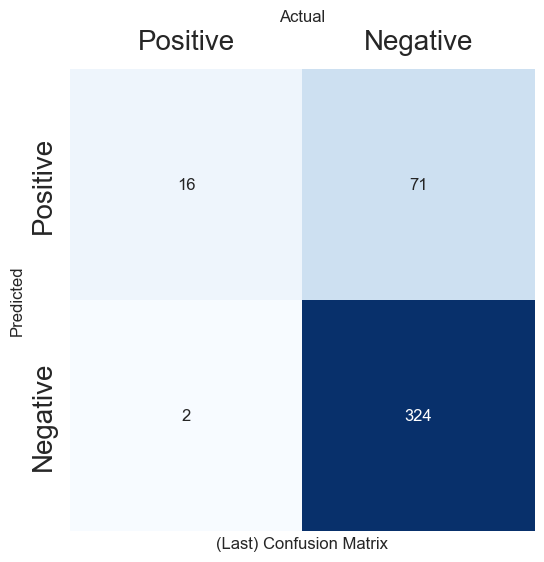

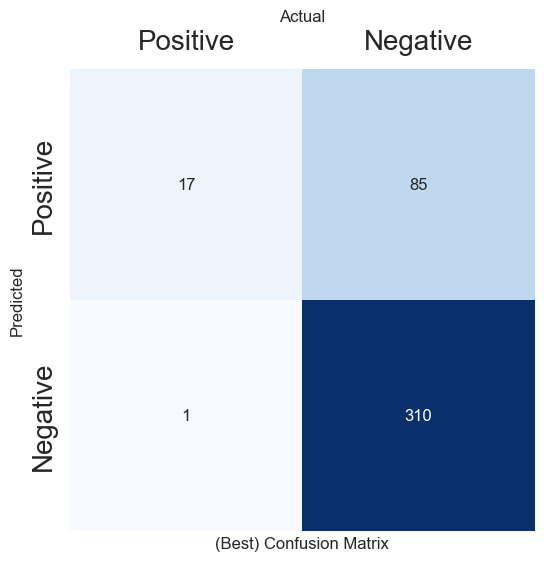

Finished


In [125]:
################### initialize Log lists ##########################

last_auc_score_log = []
last_balanced_acc_log = []

last_tp_log = []
last_fp_log = []
last_tn_log = []
last_fn_log = []

best_auc_score_log = []
best_balanced_acc_log = []

best_tp_log = []
best_fp_log = []
best_tn_log = []
best_fn_log = []

################### set the model ##########################

input_size = len(features)
hidden_size = 256
num_classes = 1
batch_size = 32
learning_rate = 0.001
epochs = 301

model = Net2(input_size, hidden_size, num_classes).to(device)
net_name = "Net2"

# Loss and optimizer
    
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay = 0.001)

training_portion = df[:20001]
valid_portion = df[20001:]

train_dataset = MakeDataset(training_portion)
valid_dataset = MakeDataset(valid_portion)
    
################### Set the directories ##########################

if not os.path.exists(f"{net_name}, plots for {hidden_size} hidden and {batch_size} batch"):
    os.mkdir(f"{net_name}, plots for {hidden_size} hidden and {batch_size} batch")
 
   ################### Train the model ##########################
  
    
# Custom made sampler instead of shuffle to get balanced batches
train_loader = DataLoader(train_dataset, batch_size=len(training_portion),
                            sampler=BalancedBatchSampler(train_dataset, train_dataset.y_train))
valid_loader = DataLoader(valid_dataset, batch_size=len(valid_portion),
                            sampler=BalancedBatchSampler(valid_dataset, valid_dataset.y_train))
test_loader = DataLoader(valid_dataset, batch_size=len(valid_portion), shuffle=False)
    
history = model_train_with_save(model, train_loader, valid_loader,
                                        epochs, net_name=f"{net_name}", verbose="yes")
history = pd.DataFrame(history)
    
################### End of the model statistics ##########################

last_auc_score, last_balanced_acc, last_tp, last_tn, last_fp, last_fn = model_test(model, test_loader)
last_tpr = last_tp / (last_tp + last_fn)
last_tnr = last_tn / (last_tn + last_fp)

last_auc_score_log.append(last_auc_score)
last_balanced_acc_log.append(last_balanced_acc)
last_tp_log.append(last_tp)
last_tn_log.append(last_tn)
last_fp_log.append(last_fp)
last_fn_log.append(last_fn)
    
print("Sensitivity(Last Model):", last_tpr, ", Specificity(Last Model):", last_tnr)
print("Balanced Accuracy(Last Model):", last_balanced_acc)
print("AUROC Score(Last Model):", last_auc_score)
    
print("------------------------------------------------------")
    
################### Saved model statistics ##########################
    
saved_auc_score_log = []
saved_balanced_acc_log = []
y = 1
epochs_list = [x for x in range(0, epochs, y)]
    
for epoch in epochs_list: 
        
    model = Net2(input_size, hidden_size, num_classes)
    model.load_state_dict(torch.load(f'model_weights_for_{net_name}_epoch_{epoch}.pt'))
    
    auc_score, balanced_acc, tp, tn, fp, fn = model_test(model, test_loader)
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    saved_auc_score_log.append(auc_score)
    saved_balanced_acc_log.append(balanced_acc)
    
#print("Best epoch was at index:", np.argmax(saved_balanced_acc_log))
best_epoch = epochs_list[np.argmax(saved_auc_score_log)]
print("Best epoch was:", best_epoch)
    
model = Net2(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load(f'model_weights_for_{net_name}_epoch_{best_epoch}.pt'))
    
best_auc_score, best_balanced_acc, best_tp, best_tn, best_fp, best_fn = model_test(model, test_loader)
best_tpr = best_tp / (best_tp + best_fn)
best_tnr = best_tn / (best_tn + best_fp)
    
best_auc_score_log.append(best_auc_score)
best_balanced_acc_log.append(best_balanced_acc)
best_tp_log.append(best_tp)
best_tn_log.append(best_tn)
best_fp_log.append(best_fp)
best_fn_log.append(best_fn)
        
print("Sensitivity(Best Model):", best_tpr, ", Specificity(Best Model):", best_tnr)
print("Balanced Accuracy(Best Model):", best_balanced_acc)
print("AUROC Score(Best Model):", best_auc_score)
    
    
    
################### Plots ##########################
    
    ################### Loss Curves ##########################
    
fig = px.line(history, x='epochs', y=['train_loss', 'valid_loss'])
fig.update_layout(
    title=f'training and Validation Loss Throughout the Model',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    legend_title='Loss Type'
)
fig.show() 
    
    ################### Balanced and AUROC for epochs ##########################
        
trace1 = go.Scatter(
x=epochs_list,
y=saved_balanced_acc_log,
mode='lines+markers'
)

layout1 = go.Layout(
    title=f'Balanced Accuracy Throughout Epochs',
    xaxis=dict(title='Epochs'),
    yaxis=dict(title='Balanced Accuracy') #range=[0, 1]
)

fig1 = go.Figure(data=[trace1], layout=layout1)
fig1.show()

trace2 = go.Scatter(
    x=epochs_list,
    y=saved_auc_score_log,
    mode='lines+markers'
)

layout2 = go.Layout(
    title=f'AUC Score Throughout Epochs',
    xaxis=dict(title='Epochs'),
    yaxis=dict(title='AUROC') #range=[0, 1]
)

fig2 = go.Figure(data=[trace2], layout=layout2)
fig2.show()

################### Total Confusion Matrix ##########################
        
last_cf_matrix = pd.DataFrame([[last_tp, last_fp],
            [last_fn, last_tn]], columns = ['Positive','Negative'], index = ['Positive','Negative'])
sns.set (rc = {'figure.figsize':(6, 6)})
plt.figure()
    
sns.heatmap(last_cf_matrix, annot=True, cmap='Blues', cbar=False, fmt='g')
    
plt.tick_params(axis='both', which='major', labelsize=20, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel(f'(Last) Confusion Matrix')

last_cf = f"{net_name}, plots for {hidden_size} hidden and {batch_size} batch/last_confusion_matrix.png"
plt.savefig(last_cf)
    
plt.show()
    
    
    
    ################### Best Confusion Matrix ##########################
    
best_cf_matrix = pd.DataFrame([[best_tp, best_fp],
                [best_fn, best_tn]], columns = ['Positive','Negative'], index = ['Positive','Negative'])
sns.set (rc = {'figure.figsize':(6, 6)})
plt.figure()
    
sns.heatmap(best_cf_matrix, annot=True, cmap='Blues', cbar=False, fmt='g')
    
plt.tick_params(axis='both', which='major', labelsize=20, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.title('Actual')
plt.ylabel('Predicted')
plt.xlabel(f'(Best) Confusion Matrix')
    
best_cf = f"{net_name}, plots for {hidden_size} hidden and {batch_size} batch/best_confusion_matrix.png"
plt.savefig(best_cf)
    
plt.show()
        
    ################### Save Plots  ##########################
    
fig.write_image(f"{net_name}, plots for {hidden_size} hidden and {batch_size} batch/hidden size {hidden_size} and batch size {batch_size}.png", engine='orca')
fig1.write_image(f"{net_name}, plots for {hidden_size} hidden and {batch_size} batch/batch and hidden {batch_size}, {hidden_size}; balanced_accuracy.png", engine='orca')
fig2.write_image(f"{net_name}, plots for {hidden_size} hidden and {batch_size} batch/batch and hidden {batch_size}, {hidden_size}; auroc.png", engine='orca')
    
print("Finished")

In [37]:
df_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
id,,,,,,,,,,,,,,,,,
15304,1,0.695401,0,0,0,1,-0.332003,0.729589,0,0,1,0,0,1,0,0,0
15305,0,1.292925,1,0,0,0,-0.654700,0.028298,0,0,1,0,0,1,0,0,0
15306,1,-1.694691,0,0,1,0,0.320164,-1.259789,0,0,0,0,1,1,0,0,0
15307,1,0.649438,0,0,0,0,-0.741532,1.874555,1,0,0,0,0,0,0,0,1
15308,0,-0.453681,0,0,0,1,0.548945,0.257291,0,0,1,0,0,0,0,0,1


In [28]:
input_data = df_test.values
print(input_data)
input_tensor = torch.tensor(input_data, dtype=torch.float32)
print(input_tensor)

[[ 1.          0.69540148  0.         ...  0.          0.
   0.        ]
 [ 0.          1.29292455  1.         ...  0.          0.
   0.        ]
 [ 1.         -1.69469084  0.         ...  0.          0.
   0.        ]
 ...
 [ 1.         -1.78661747  0.         ...  0.          0.
   0.        ]
 [ 0.         -0.49964468  0.         ...  0.          1.
   0.        ]
 [ 1.         -1.83258078  0.         ...  0.          0.
   0.        ]]
tensor([[ 1.0000,  0.6954,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  1.2929,  1.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 1.0000, -1.6947,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 1.0000, -1.7866,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000, -0.4996,  0.0000,  ...,  0.0000,  1.0000,  0.0000],
        [ 1.0000, -1.8326,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])


In [126]:
model = Net2(input_size, hidden_size, num_classes)
model.load_state_dict(torch.load(f'model_weights_for_{net_name}_epoch_{best_epoch}.pt'))

<All keys matched successfully>

In [127]:
with torch.no_grad():
    model.eval()
    outputs = model(input_tensor)
    print(outputs)
    print(outputs.shape)

tensor([[0.4503],
        [0.7464],
        [0.0171],
        ...,
        [0.0122],
        [0.0726],
        [0.0116]])
torch.Size([10204, 1])


In [129]:
sub_file = open("subTwoLayersFullSet.csv", "w")

ID = 15304
run = 0

sub_file.write("id,stroke\n")
for output in outputs:
    sub_file.write(f"{ID},{output.item()}\n")
    ID += 1
    run +=1
    
print(run)

10204
